Number of nodes: 2004
Number of edges: 20452
Average degree of the network: 10.0
Network density: 0.0101903033673


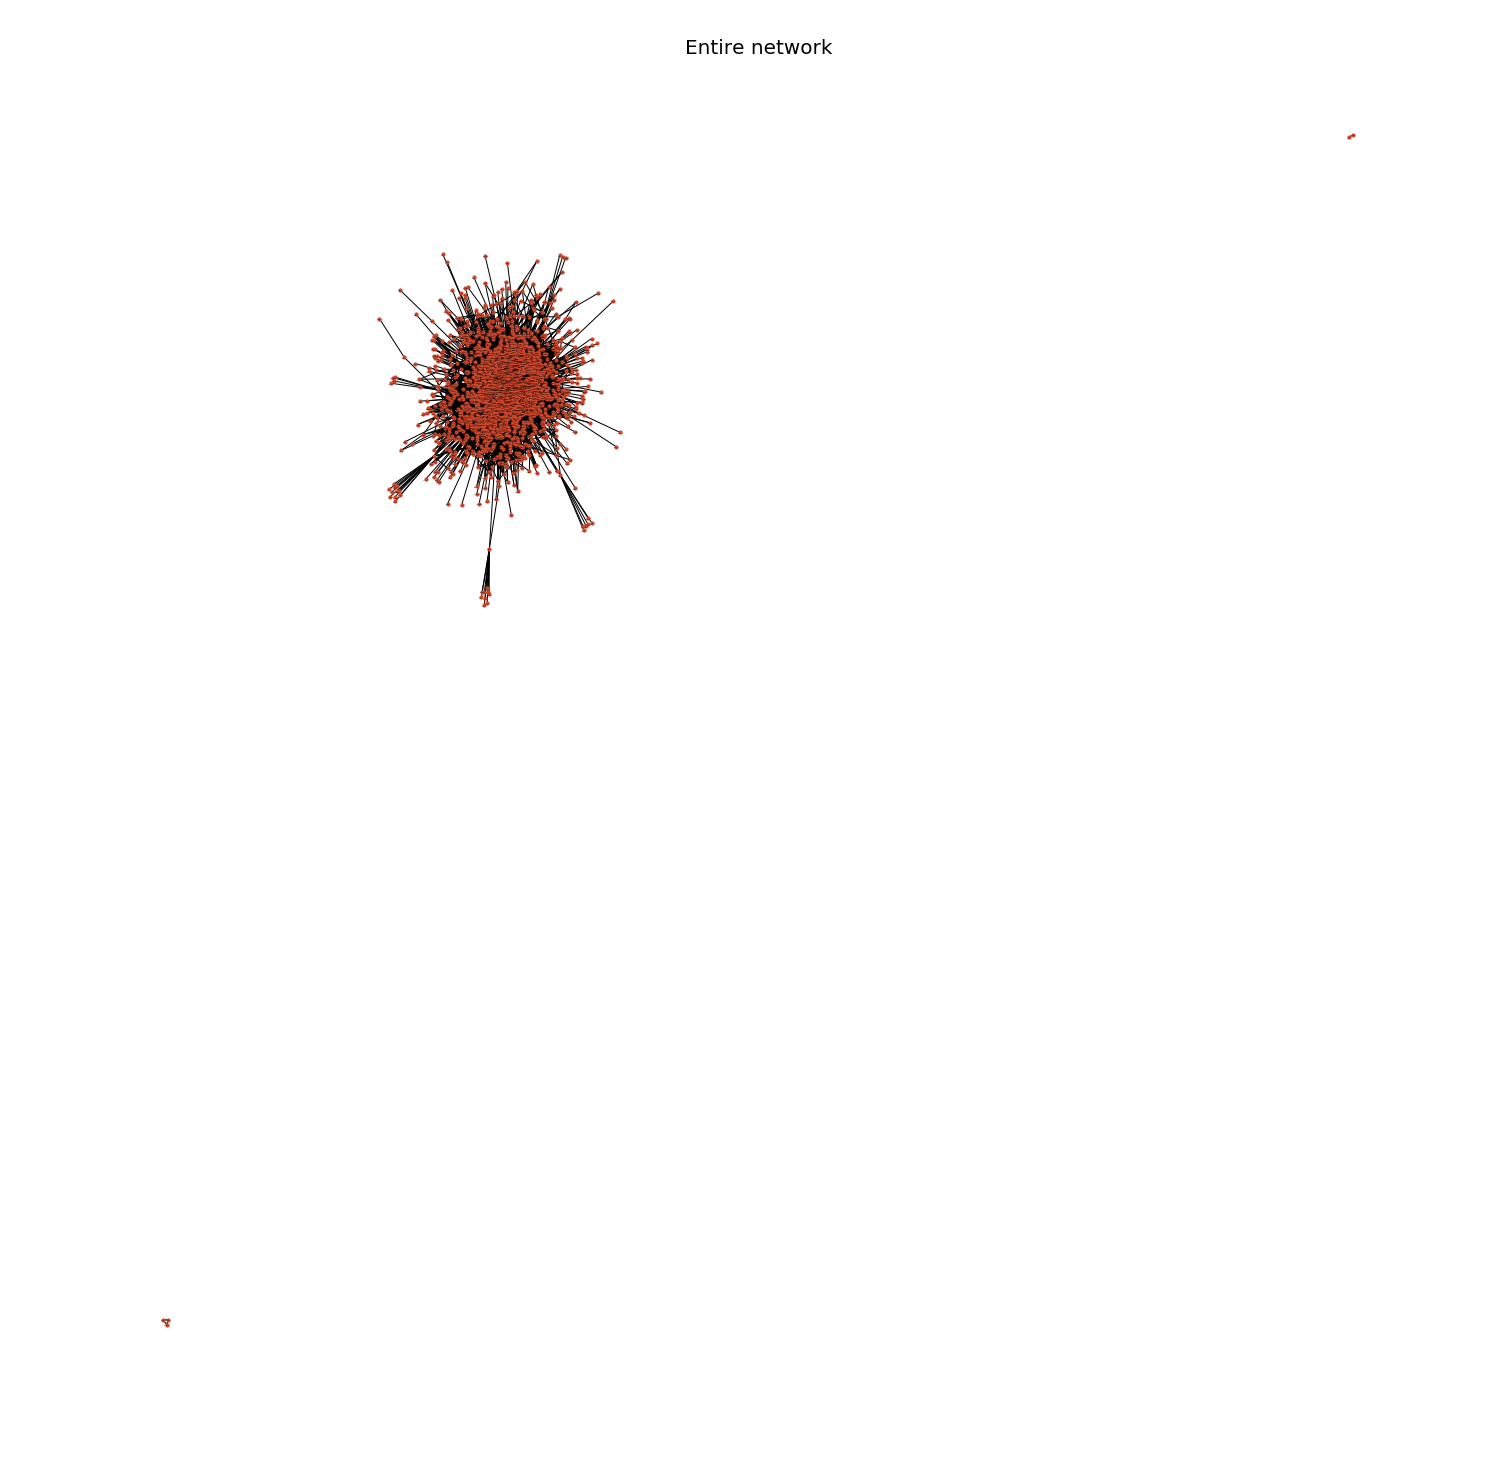

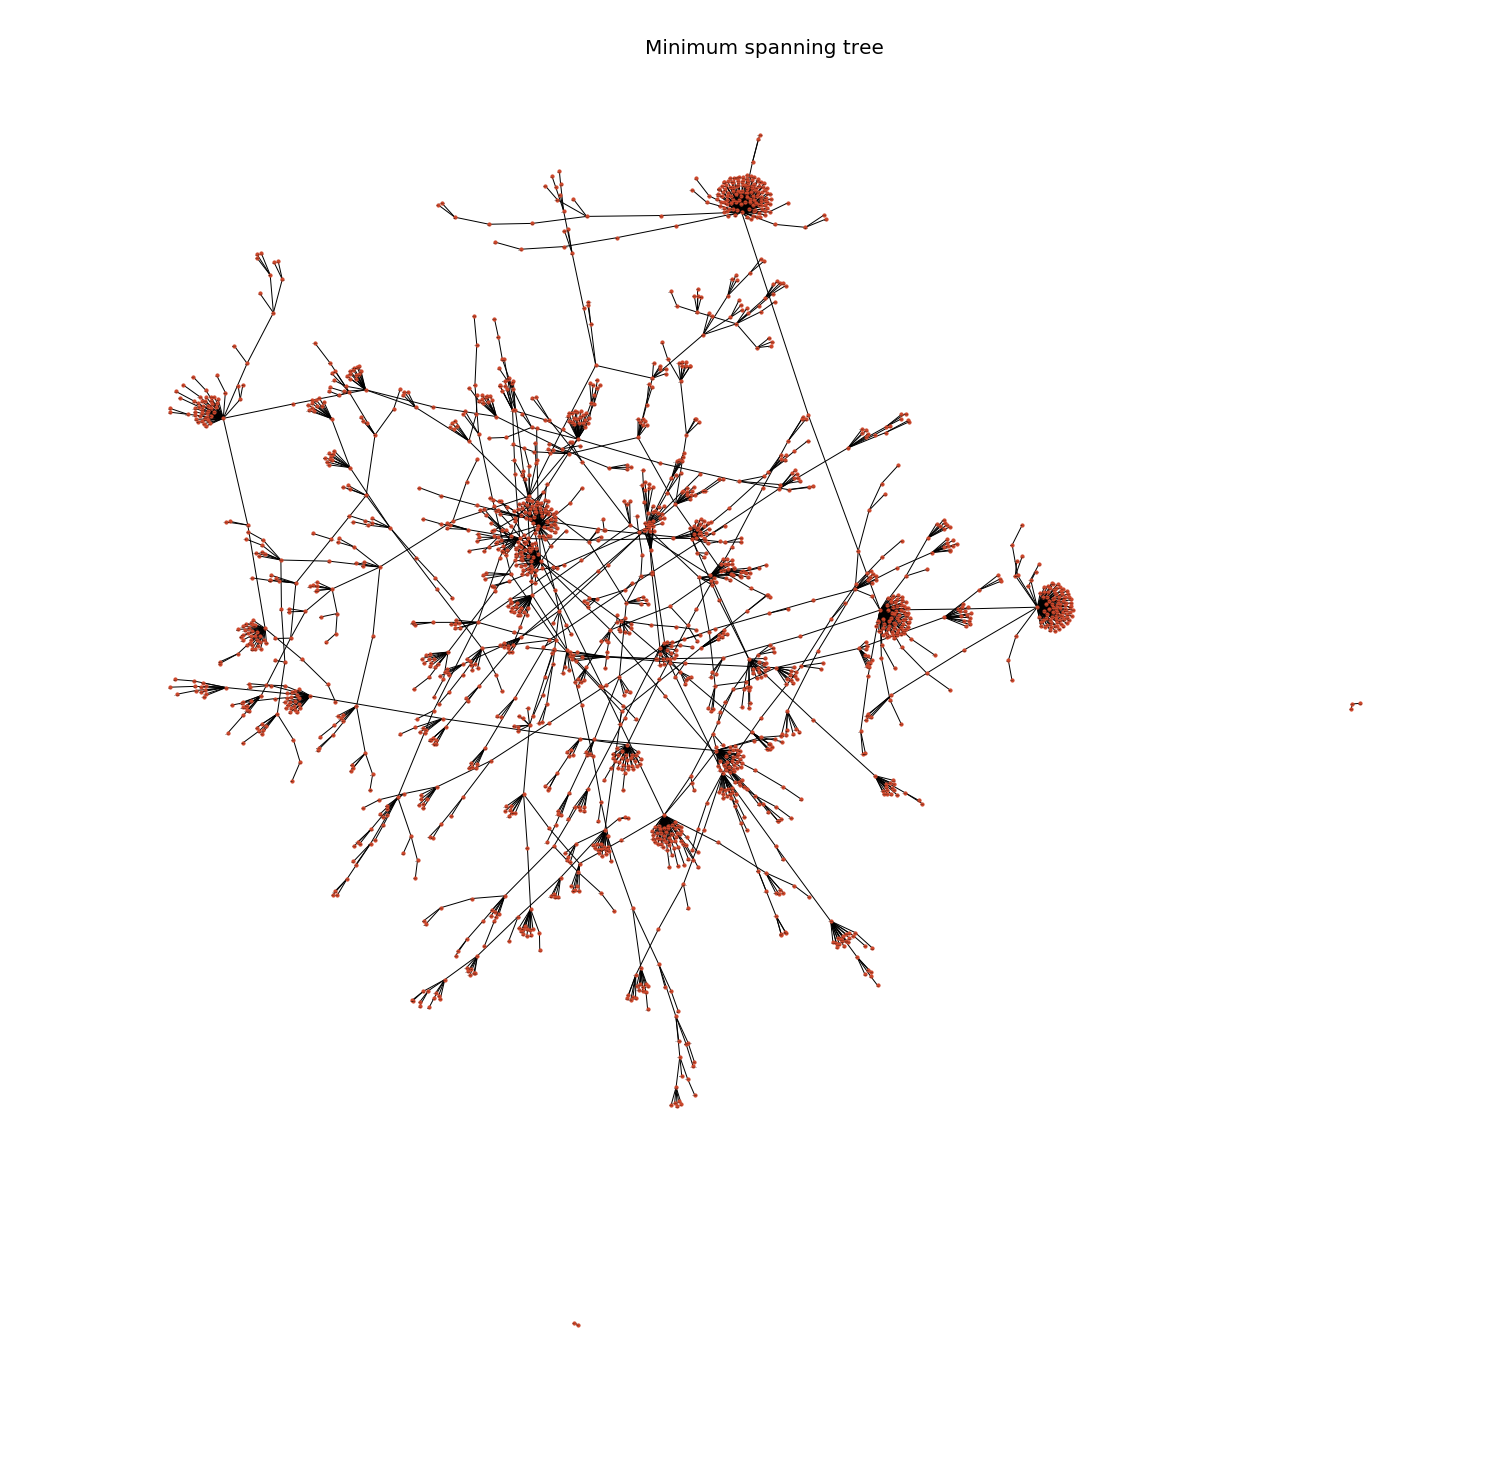

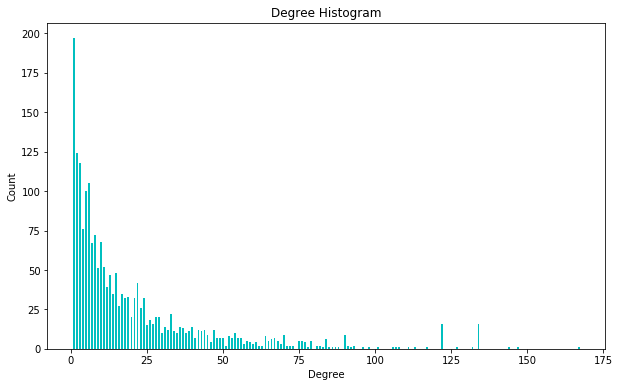

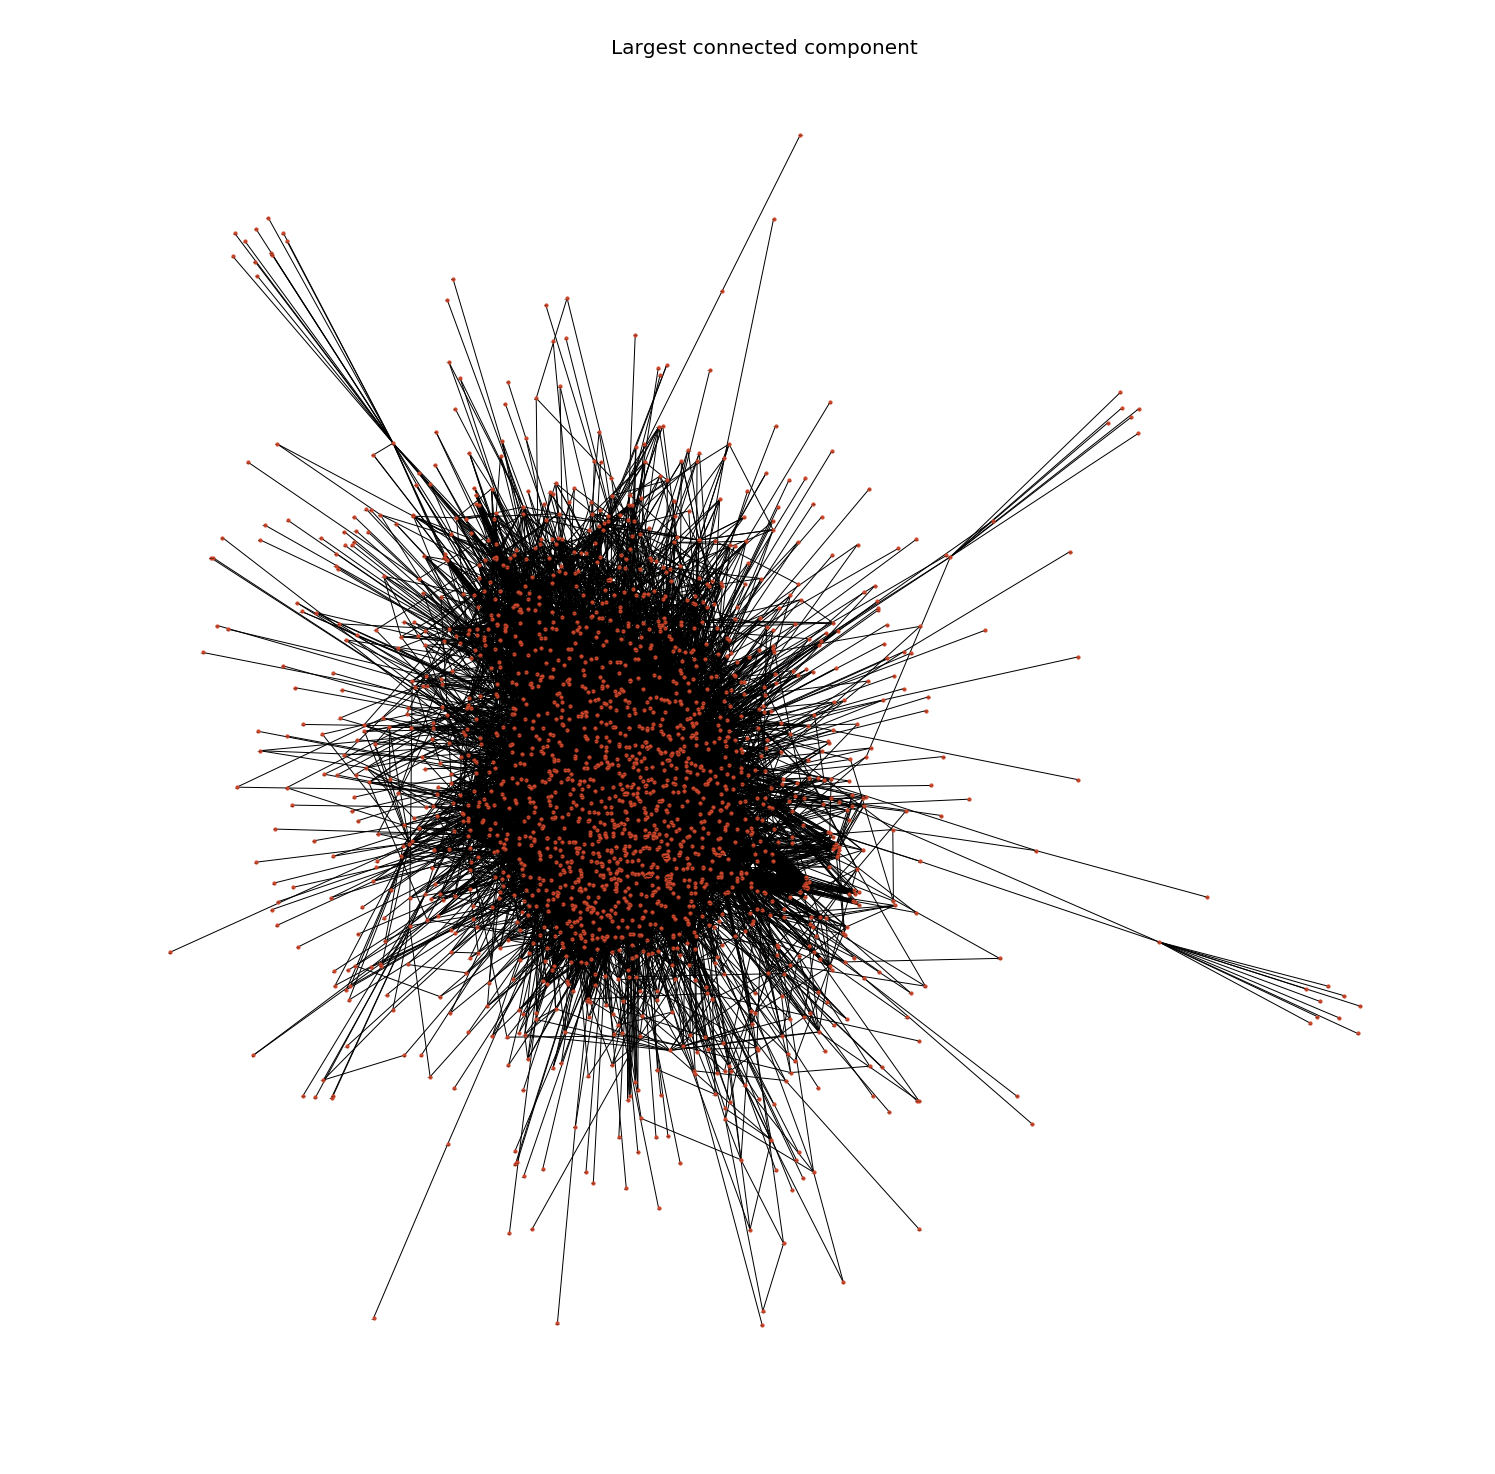

Diameter of largest connected component: 7
Center of largest connected component:
['ZK131.6', 'ZK131.5', 'ZK131.4', 'ZK131.1', 'C09G12.9', 'D1054.3', 'ZK131.9', 'ZK131.8', 'T14F9.1', 'T05E11.1', 'C01F6.5', 'T06E6.1', 'ZK1098.1', 'Y47A7.1', 'ZK1098.4', 'D1086.9', 'VZK822L.1', 'C16A3.10', 'C04H5.1', 'Y71G12B.27', 'Y54E10BR.4', 'Y54E10BR.5', 'F41G4.2', 'T02G5.8', 'T05H10.5', 'Y47G6A.18', 'W08E3.3', 'T05E11.6', 'C47E8.5', 'K01C8.9', 'ZK1098.5', 'C04G6.3', 'F54C9.9', 'F54C9.1', 'C47D12.8', 'M106.5', 'Y37E3.8', 'Y37E3.9', 'Y37E3.7', 'ZK1127.5', 'Y22D7AL.10', 'T05H4.4', 'T05H4.5', 'T05H4.6', 'Y73B6BL.6', 'F41H10.8', 'R03A10.4', 'Y71F9B.7', 'Y71F9B.4', 'F28F8.3', 'Y71F9B.3', 'F22D6.3', 'K12H4.3', 'K10C3.5', 'F29D10.4', 'B0393.1', 'C29E4.8', 'E04D5.1', 'K08E4.1', 'C08B11.6', 'Y37D8A.1', 'R05F9.10', 'B0464.5', 'B0464.1', 'C42C1.5', 'Y66H1A.4', 'Y60A3A.9', 'F07A11.2', 'ZC302.1', 'ZK131.10', 'Y54E10BR.2', 'B0336.2', 'R06A4.4', 'C07G2.3', 'T19B10.1', 'F56H1.4', 'Y71G12B.10', 'Y71G12B.15', 'K07D4.3'

In [1]:
import networkx as nx
import collections
import matplotlib.pyplot as plt
from networkx.algorithms.community import k_clique_communities

file_data = open("SC-LC.txt","r").readlines()
G = nx.Graph()

for each_line in file_data:
    y = each_line.split('\t')
    w = float(y[2].strip())
    G.add_edge(y[0], y[1], weight = w)
    
no_of_nodes = G.number_of_nodes()
no_of_edges = G.number_of_edges()
network_degree = G.degree()
network_density = nx.density(G)
print 'Number of nodes:',no_of_nodes
print 'Number of edges:',no_of_edges
print 'Average degree of the network:',float(no_of_edges/no_of_nodes)
print 'Network density:',network_density

pos = nx.fruchterman_reingold_layout(G)
options = {
    'node_color': '#CC472B',
    'node_size': 10,
    'with_labels': True,
    'font_size': 1,
}
fig = plt.figure(figsize=(20,20))
fig.suptitle('Entire network', fontsize=20)
nx.draw(G, pos, **options)
plt.show()
fig.savefig('entire_network.pdf')

T=nx.minimum_spanning_tree(G)
pos = nx.fruchterman_reingold_layout(T)
options = {
    'node_color': '#CC472B',
    'node_size': 10,
    'with_labels': True,
    'font_size': 1,
}
fig = plt.figure(figsize=(20,20))
fig.suptitle('Minimum spanning tree', fontsize=20)
nx.draw(T, pos, **options)
plt.show()
fig.savefig('minimum_spanning_tree.pdf')

degree_sequence = sorted([d for n, d in network_degree], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig = plt.figure(figsize=(10,6))
plt.bar(deg, cnt, width=0.6, color = 'c')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()
fig.savefig('degree_distribution_histogram.pdf')

LC_G = max(nx.connected_component_subgraphs(G), key=len)
pos = nx.fruchterman_reingold_layout(LC_G)
options = {
    'node_color': '#CC472B',
    'node_size': 10,
    'with_labels': True,
    'font_size': 1,
}
fig = plt.figure(figsize=(20,20))
fig.suptitle('Largest connected component', fontsize=20)
nx.draw(LC_G, pos, **options)
plt.show()
fig.savefig('largest_connected_component.pdf')


print 'Diameter of largest connected component:',nx.diameter(LC_G)

print 'Center of largest connected component:\n',nx.center(LC_G)

kcc = list(k_clique_communities(G, 3))
print '\nNumber of clique communities with 3 nodes:',len(kcc)

d = sorted(network_degree, key=lambda k: k[1], reverse = True)
print '\nMost significant five protein based on degree value of nodes - SET A'
for i in range(0,5):
    top = d[i]
    print top[0],'with degree value',top[1]
    
centrality = nx.eigenvector_centrality(G)
s = list(sorted(centrality, key=centrality.__getitem__, reverse=True))
print '\nMost significant five protein based on Eigenvector centrality value of nodes - SET B'
for i in range(0,5):
    print s[i]
print '\nBased on the SET A and B,\nZK131.4 and ZK131.1 might have potentially the biggest effect on rest of the network'
